# **Unsupervised_Clustering_Customer_Segmentation_Project**

This project is about segmenting the Customers of `online+retail dataset` using Unsupervised Algorithms.\
In this project Unsupervised Algorithms like K-Means Clustering and Hierarchical Clustering models are used.

**Github Link:**

https://github.com/kaungmyat999/Unsupervised_Clustering_Customer_Segmentation

In [16]:
#importing required modules

import os
import math
import scipy
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display


from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [17]:
!pip install openpyxl

In [18]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2024-08-10 05:58:37--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip.1’

online+retail.zip.1     [     <=>            ]  22.62M  23.3MB/s    in 1.0s    

2024-08-10 05:58:38 (23.3 MB/s) - ‘online+retail.zip.1’ saved [23715478]



In [19]:
!unzip ./online+retail.zip -d data

Archive:  ./online+retail.zip
replace data/Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: data/Online Retail.xlsx  


## **Data**

**Name**: **Customer Segmentation Dataset**\
**Source**: UC Irvine machine learning repository\
**Link**: https://archive.ics.uci.edu/dataset/352/online+retail


This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Objective & Procedure of the Project**:¶
<br/>

- Understanding the Dataset & doing cleanup (if required).
- Build clustering models to segment the customer based on similarity.
- Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.


In [20]:
#read the data using panda's method
df = pd.read_excel('./data/Online Retail.xlsx')

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



Inference: The Datset consists of 8 features & 541909 samples.


In [21]:
#show the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


According to the output of the dataset that we got, we can conclude the following:

Memory Size of the dataset is around 33.1MB.

It has 541909 entries and contains total of 8 columns with 4 different types of data such as datetime64[ns](1), float64(2), int64(1), object(4).

**InvoiceNo**: A unique identifier for each transaction. It signifies the invoice number associated with each purchase. For example, "536365" is the invoice number for the transactions shown.

**StockCode**: A unique identifier for each item (product). For instance, "85123A" corresponds to the "WHITE HANGING HEART T-LIGHT HOLDER."

**Description**: A textual description of the item. Examples include "WHITE HANGING HEART T-LIGHT HOLDER" and "WHITE METAL LANTERN."

**Quantity**: The number of units of the item purchased. In the sample, all quantities are 6 or 8.

**InvoiceDate**: The date and time when the transaction occurred. For example, "2010-12-01 08:26:00" indicates that the transaction took place on December 1, 2010, at 08:26 AM.

**UnitPrice**: The price per unit of the item. For example, the "WHITE HANGING HEART T-LIGHT HOLDER" costs 2.55 (in the currency relevant to the dataset, likely GBP).

**CustomerID**: A unique identifier for the customer who made the purchase. For instance, "17850.0" is the customer ID in the shown rows.

**Country**: The country where the customer resides. In the example provided, all customers are from the "United Kingdom."

## **Goals of the Dataset**:

We can use this dataset in the following cases. But we here will only use for **Customer Segmentation**

**Sales Analysis**: The dataset can be used to analyze sales patterns, such as identifying best-selling products, peak sales times, and customer purchasing behavior.

**Customer Segmentation**: By examining customer IDs and their purchasing patterns, businesses can segment customers based on buying behavior and tailor marketing strategies accordingly.

**Inventory Management**: Understanding which products are popular and in what quantities can help in managing stock levels more efficiently.

**Revenue Analysis**: Calculating total revenue, average order value, and other financial metrics to assess business performance.

**Market Trends**: Identifying trends over time, such as seasonal variations in product demand.

**Customer Retention**: Analyzing repeat purchases by the same customers to develop loyalty programs and improve customer retention strategies.

## **Data Cleaning**

In [22]:
#To calculates the percentage of missing values (NaNs) for each column in a DataFrame
round(100*(df.isnull().sum())/len(df) )

,0
InvoiceNo,0.0
StockCode,0.0
Description,0.0
Quantity,0.0
InvoiceDate,0.0
UnitPrice,0.0
CustomerID,25.0
Country,0.0


In [23]:
#Dropping null values
df = df.dropna()
df.shape

(406829, 8)

In [24]:
df['CustomerID'] = df['CustomerID'].astype(str)

## **Features engineering**
 **Calculating the Missing Values % contribution in DF**


In [25]:
# We only need date (not timestamps)
df["InvoiceDate"] = df["InvoiceDate"].dt.date

# To get total sum of the product (make more sense for transcation analysis and reduce the dimension of the data)
df["TotalSum"] = df["Quantity"] * df["UnitPrice"]

#creates a snapshot_date by taking the maximum date from the InvoiceDate column in the DataFrame df and then adding one day to it.
snapshot_date = max(df.InvoiceDate) + datetime.timedelta(days=1)

#(snapshot_date - x.max()).days computes the difference in days between the snapshot_date and the most recent invoice date.
customers = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                            'InvoiceNo': 'count','TotalSum': 'sum'})

#Columns renaming
customers.rename(columns = {'InvoiceDate': 'Recency','InvoiceNo': 'Frequency',
                            'TotalSum': 'Amount'}, inplace=True)

#customers = customers[customers.MonetaryValue>0]
display(customers.head())

,Recency,Frequency,Amount
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


### Data Types of Customers DF

In [26]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4372 non-null   int64  
 1   Frequency  4372 non-null   int64  
 2   Amount     4372 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 136.6+ KB


### Checking the stats of all the columns

In [27]:
display(customers.describe())

,Recency,Frequency,Amount
count,4372.000000,4372.000000,4372.000000
mean,92.581199,93.053294,1898.459701
std,100.772139,232.471608,8219.345141
min,1.000000,1.000000,-4287.630000
25%,17.000000,17.000000,293.362500
50%,51.000000,42.000000,648.075000
75%,144.000000,102.000000,1611.725000
max,374.000000,7983.000000,279489.020000


### **Recency**

**Mean (Average)**: 92.58 days\
On average, customers made their last purchase approximately 92.58 days ago.\
**Standard Deviation (Std)**: 100.77 days\
There is a wide variation in the recency of purchases, indicating diverse customer behavior.\
**Minimum (Min)**: 1 day\
The most recent purchase was made just 1 day ago.\
**Maximum (Max)**: 374 days\
The least recent purchase was made 374 days ago.\
**25th Percentile (25%)**: 17 days\
25% of the customers made their last purchase 17 or fewer days ago.\
**50th Percentile (Median)**: 51 days\
Half of the customers made their last purchase 51 or fewer days ago.\
**75th Percentile (75%)**: 144 days\
25% of the customers made their last purchase 144 or more days ago\

### **Frequency**
**Mean**: 93.05 purchases\
On average, customers made around 93 purchases.\
**Standard Deviation**: 232.47 purchases\
There is a high variation in the number of purchases made by customers,\ suggesting that some customers are much more frequent purchasers than others.\
**Minimum**: 1 purchase\
The least frequent customers made only 1 purchase.\
**Maximum**: 7983 purchases\
The most frequent customer made 7983 purchases, indicating a small group of highly frequent buyers.\
**25th Percentile**: 17 purchases
25% of the customers made 17 or fewer purchases.
**Median**: 42 purchases
Half of the customers made 42 or fewer purchases.
**75th Percentile**: 102 purchases
25% of the customers made 102 or more purchases.

### **Amount**
**Mean**: 1898.46\
The average total spending by customers is 1898.46.\
**Standard Deviation**: 8219.35\
There is a significant variation in the amount spent, indicating that some customers spend much more than others.\
**Minimum**: -4287.63\
The negative minimum value suggests that some customers have a negative balance, possibly due to returns or refunds exceeding purchases.\
**Maximum**: 279489.02\
The highest amount spent by a customer is 279,489.02, indicating some high-value customers.\
**25th Percentile**: 293.36\
25% of the customers spent 293.36 or less.\
**Median**: 648.08\
Half of the customers spent 648.08 or less.
**75th Percentile**: 1611.73\
25% of the customers spent 1611.73 or more.

## **Key Observations**

**Recency and Frequency Variation**: The large standard deviations in recency and frequency indicate diverse purchasing behaviors among customers. Some customers are very recent and frequent buyers, while others have been inactive for a long time and make infrequent purchases.

**Spending Behavior**: The large standard deviation and range in the amount spent highlight significant differences in customer value. Some customers are high spenders, while others spend relatively little. The negative minimum value requires further investigation, as it might indicate returns or errors in the data.

**Potential for Segmentation**: The data suggests potential for segmenting customers based on their recency, frequency, and spending behavior. For example, frequent and recent buyers could be targeted differently than infrequent and lapsed customers.








## **Exploratory Data Analysis (EDA)**


In [28]:
customers.head()

,Recency,Frequency,Amount
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


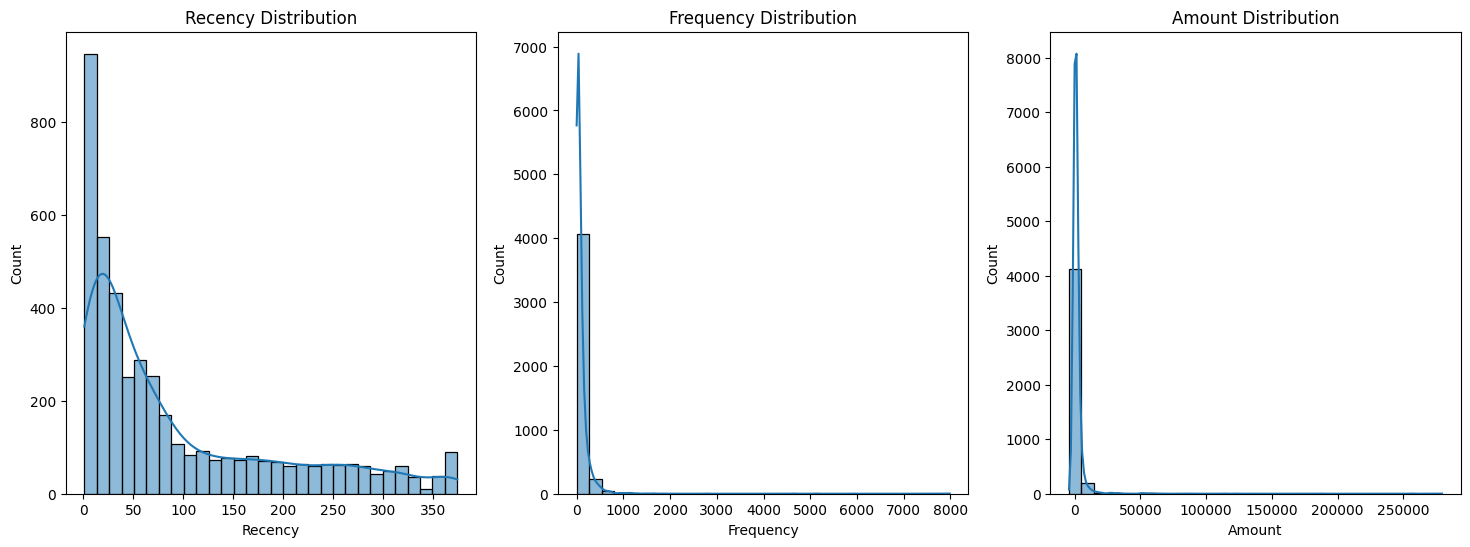

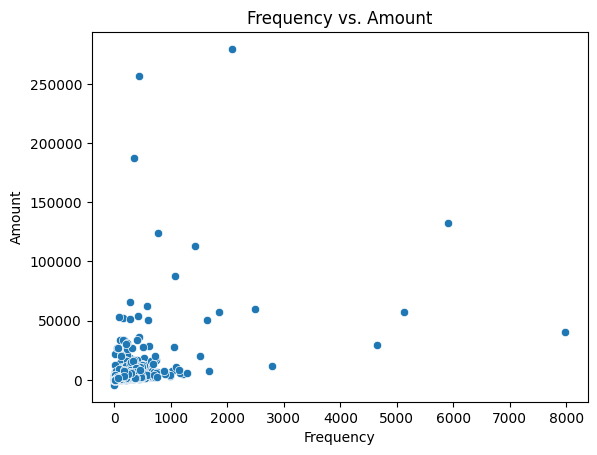

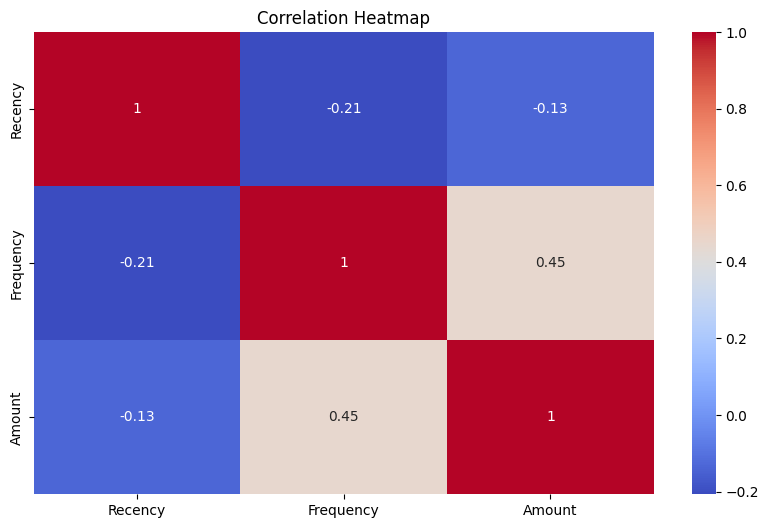

In [30]:
import matplotlib.pyplot as plt


# Histograms for Recency, Frequency, and Amount
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(customers['Recency'], bins=30, kde=True, ax=axes[0]).set_title('Recency Distribution')
sns.histplot(customers['Frequency'], bins=30, kde=True, ax=axes[1]).set_title('Frequency Distribution')
sns.histplot(customers['Amount'], bins=30, kde=True, ax=axes[2]).set_title('Amount Distribution')
plt.show()

# Scatter plot for Frequency vs. Amount
sns.scatterplot(x='Frequency', y='Amount', data=customers).set_title('Frequency vs. Amount')

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(customers.corr(), annot=True, cmap='coolwarm').set_title('Correlation Heatmap')
plt.show()

In [31]:
import plotly.express as px


# Create a DataFrame containing the selected attributes
attributes = ['Amount', 'Frequency', 'Recency']
data = customers[attributes]

# Create a box plot with Plotly
fig = px.box(data, y=attributes, labels={'variable': 'Attributes', 'value': 'Range'},
             title="Outliers Variable Distribution")
fig.update_layout(
    xaxis=dict(title="Attributes"),
    yaxis=dict(title="Range"),
    showlegend=False,
    boxmode='group',  # Display box plots side by side
    width=800, height=600
)
fig.show()

In [32]:
# Removing (statistical) outliers for Amount
Q1 = customers.Amount.quantile(0.05)
Q3 = customers.Amount.quantile(0.95)
IQR = Q3 - Q1
customers = customers[(customers.Amount >= Q1 - 1.5*IQR) & (customers.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = customers.Recency.quantile(0.05)
Q3 = customers.Recency.quantile(0.95)
IQR = Q3 - Q1
customers = customers[(customers.Recency >= Q1 - 1.5*IQR) & (customers.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = customers.Frequency.quantile(0.05)
Q3 = customers.Frequency.quantile(0.95)
IQR = Q3 - Q1
customers = customers[(customers.Frequency >= Q1 - 1.5*IQR) & (customers.Frequency <= Q3 + 1.5*IQR)]

**Purpose of Outlier Removal**:¶\
Outliers can distort statistical analyses and models by introducing noise and skewing results.

Removing outliers helps in obtaining a more representative view of the dataset and its underlying patterns.

It can improve the accuracy and reliability of insights derived from the data.

However, removing outliers should be done carefully, and the choice of the 1.5*IQR range is a common heuristic.

"The 1.5*IQR rule was chosen for outlier removal as it is a common heuristic that balances the need to remove extreme values without losing too much data. This helps to ensure that the clustering model will be more stable and not skewed by a few extreme points.

It's essential to consider the context and business goals.



"By standardizing the Amount, Frequency, and Recency features, we ensure that each attribute contributes equally to the clustering algorithm. This is crucial for algorithms like K-Means, which rely on distance metrics and can be biased if features are on different scales.

"Outlier removal might lead to the exclusion of some high-value customers, but it also prevents these customers from disproportionately influencing the clustering results. This trade-off is important for creating more representative clusters."

In summary, the provided code removes statistical outliers from the "Amount," "Recency," and "Frequency" attributes to ensure that subsequent analyses and modeling are based on a cleaner and more representative dataset.

In [33]:
attributes = ['Amount', 'Frequency', 'Recency']

fig = px.box(customers, y=attributes, title="Outliers Variable Distribution",
             labels={'variable': 'Attributes', 'value': 'Range'},
             boxmode='group', points='outliers')

fig.update_layout(
    xaxis=dict(title="Attributes", title_font=dict(size=14)),
    yaxis=dict(title="Range", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

**Rescaling the Attributes**\
It is extremely important to rescale the variables so that they have a comparable scale.\
There are two common ways of rescaling:
  - 1-Min-Max scaling
  - 2-Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [34]:
# Rescaling the attributes

merged_rfm = customers[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(merged_rfm)
rfm_df_scaled.shape

(4293, 3)

In [35]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.296184
1,1.731617,1.042467,-0.901811
2,0.300128,-0.463636,-0.179044
3,0.277517,-0.044720,-0.743397
4,-0.533235,-0.603275,2.147671


## **Models Building & Parameter Tuning**
### **K-Means Clustering**
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
The algorithm works as follows:

- 1-First we initialize k points, called means, randomly.

- 2-We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.

- 3-We repeat the process for a given number of iterations and at the end, we have our clusters

**Time Complexity**:\
The time complexity of K-Means Clustering is `O(n * k * d * i)`, where:

n is the number of data points.\
k is the number of clusters.\
d is the number of dimensions (features) in the data.\
i is the number of iterations until convergence.

**Runtime Analysis:**

**Efficiency**: K-Means is generally efficient and scales well with the size of the dataset due to its linear complexity in terms of the number of data points and clusters.

**Iterations**: The number of iterations can vary depending on the initial centroids and the convergence criteria. K-Means++ initialization helps reduce the number of iterations needed.

**Scalability**: For large datasets, K-Means can handle a significant number of data points, making it a preferred choice for scalable clustering solutions.

**Practical Consideration**:
If the project contains a dataset with a moderate number of features and clusters, K-Means is computationally feasible, and its runtime should be manageable. However, if the dataset is very large, the number of iterations could impact performance, especially if clusters are not well-separated.

In [36]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [37]:
kmeans.labels_

array([1, 0, 3, ..., 1, 3, 3], dtype=int32)

### Finding the Optimal Number of Clusters

We will use `Elbow Curve` to get the right number of Clusters\
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered.

The elbow method is a popular technique used in clustering analysis to determine the optimal number of clusters in a dataset. It helps you choose the number of clusters 𝑘 by plotting the sum of squared distances from each point to its assigned cluster centroid as a function of 𝑘.

Look for the point on the plot where the  sum of squared distances begins to decrease at a slower rate. This point forms an "elbow" shape. The value of
𝑘 at this point is considered the optimal number of clusters.

In [38]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)
    print("For n_clusters={0}, the Elbow score is {1}".format(num_clusters, kmeans.inertia_))

fig = px.line(x=range_n_clusters, y=ssd,
              title="Elbow Curve for K-Means Clustering",
              labels={'x': 'Number of Clusters', 'y': 'Sum of Squared Distances (SSD)'},markers=True)

fig.update_layout(
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

For n_clusters=2, the Elbow score is 7661.576059074361
For n_clusters=3, the Elbow score is 4433.974464987992
For n_clusters=4, the Elbow score is 3360.9006983346158
For n_clusters=5, the Elbow score is 2803.2642324164112
For n_clusters=6, the Elbow score is 2392.5794699075254
For n_clusters=7, the Elbow score is 2039.200276633185
For n_clusters=8, the Elbow score is 1825.7878080943854


**Silhouette Analysis**

$$silhouette\_score=p−q/max(p,q)$$

1. `p` is the mean distance to the points in the nearest cluster that the data point is not a part of.

2. `q` is the mean intra-cluster distance to all the points in its own cluster.

3. The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

Silhouette analysis helps you assess the quality of clustering and find the number of clusters that best fits your data. Let's break down the code and understand its purpose:

**Purpose of Silhouette Analysis:**

Silhouette analysis helps to assess the quality of clustering for different numbers of clusters.

The silhouette score ranges from -1 to 1, with higher values indicating better cluster separation and cohesion.

By examining silhouette scores for various cluster numbers, you can determine the optimal number of clusters that best fit your data.

In summary, this code performs silhouette analysis for a range of cluster numbers using K-Means clustering on the standardized RFM data. It helps you select the number of clusters that provides the best clustering quality for your data.

In [39]:
from sklearn.metrics import silhouette_score

# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1:.4f}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5413
For n_clusters=3, the silhouette score is 0.5084
For n_clusters=4, the silhouette score is 0.4814
For n_clusters=5, the silhouette score is 0.4636
For n_clusters=6, the silhouette score is 0.4171
For n_clusters=7, the silhouette score is 0.4158
For n_clusters=8, the silhouette score is 0.4113


For n_clusters=2, the silhouette score is 0.5411
For n_clusters=3, the silhouette score is 0.5084
For n_clusters=4, the silhouette score is 0.4777
For n_clusters=5, the silhouette score is 0.4639
For n_clusters=6, the silhouette score is 0.4174
For n_clusters=7, the silhouette score is 0.4148
For n_clusters=8, the silhouette score is 0.4120


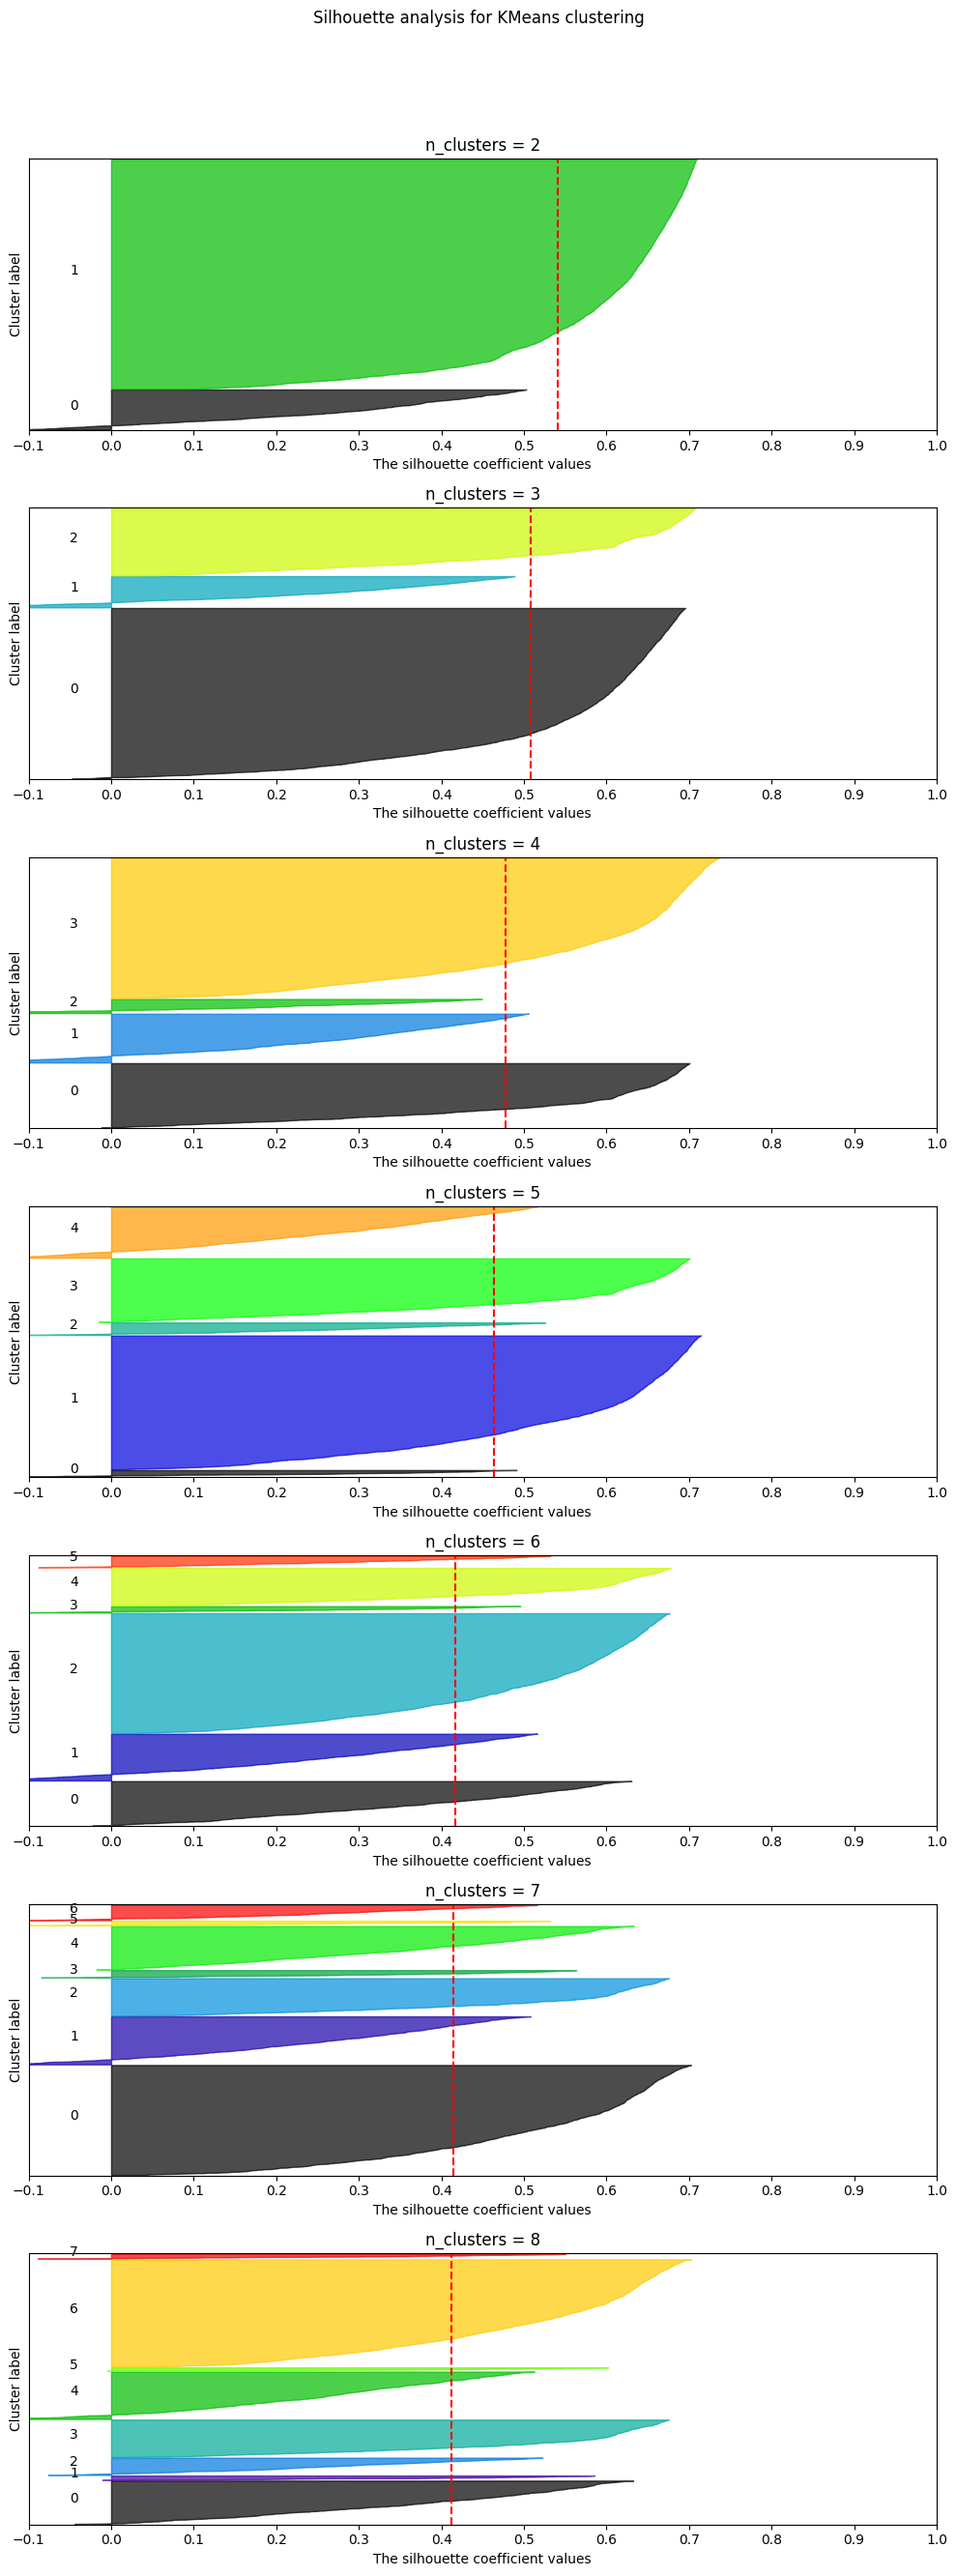

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming rfm_df_scaled is your scaled data

# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Create a figure with subplots
fig, axes = plt.subplots(len(range_n_clusters), 1, figsize=(10, len(range_n_clusters) * 4))
fig.suptitle("Silhouette analysis for KMeans clustering")

for ax, n_clusters in zip(axes, range_n_clusters):
    # Initialize KMeans
    kmeans = KMeans(n_clusters=n_clusters, max_iter=50, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_df_scaled)

    # Compute the silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print(f"For n_clusters={n_clusters}, the silhouette score is {silhouette_avg:.4f}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(rfm_df_scaled, cluster_labels)

    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(rfm_df_scaled) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"n_clusters = {n_clusters}")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([i / 10.0 for i in range(-1, 11)])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**k=2, k=6, k=7, k=8:**

These plots likely show many silhouette coefficient values close to 0, indicating data points on cluster borders. They might not be the best choices.

**k=3 and k=4:**

These plots show a better distribution of silhouette coefficients, with more points having values closer to 1 (well-separated clusters).\
**k=4** might be slightly better than **k=3** based on the provided silhouette plots, but it depends on the specific details.

In the context of clustering, when we have multiple options for the number of clusters, we typically aim to choose the number of clusters that maximizes the silhouette score. In provided output, we have calculated silhouette scores for different numbers of clusters, and we want to select the best number.\
Here's a simplified explanation for why "3" was chosen from the provided silhouette scores:\
<br/>

**Silhouette Score Meaning**:\
 The silhouette score measures how similar each data point in a cluster is to the data points in the same cluster compared to other clusters. The score ranges from -1 to 1:**

A higher score indicates better cluster separation and cohesion.

A score close to 0 suggests overlapping or ambiguous clusters.

A negative score means that data points might be assigned to the wrong clusters.

Choosing the Best Number of Clusters:
To determine the best number of clusters, you typically look for the number that gives the highest silhouette score.

**Silhouette scores**:

**For n_clusters=2, the silhouette score is 0.5413.\
For n_clusters=3, the silhouette score is 0.5084.\
For n_clusters=4, the silhouette score is 0.4777.\
For n_clusters=5, the silhouette score is 0.4662.\
For n_clusters=6, the silhouette score is 0.4170.\
For n_clusters=7, the silhouette score is 0.4149.\
For n_clusters=8, the silhouette score is 0.4027.**

==> We will use "3" as the number of clusters because it has the second-highest silhouette score (0.5085),

==> and it indicates reasonably good cluster separation and cohesion.

==> While the silhouette score for 2 clusters is slightly higher, the difference is not substantial,

==> and having 3 clusters may provide a more detailed and meaningful separation of your data.

==> Keep in mind that the choice of the number of clusters may also depend on the specific problem and the insights you want to gain from the clustering analysis.

It's often a balance between finding a simple model (few clusters) and capturing meaningful patterns (more clusters).
<br/>

**Silhouette Analysis Vs Elbow**:

Imagine you have a group of friends, and you want to split them into different teams for a game. Silhouette analysis is like a way to see how well your friends fit into their teams.

**Purpose**:

Silhouette analysis helps you figure out how good the teams are. It looks at whether your friends are happy with their teams or if they should switch to another team to be even happier.**

**Measurement**:

It gives each friend a score from -1 to 1. If the score is close to 1, it means they're really happy in their team. If it's close to 0, it means they might be confused because their team is similar to other teams. And if it's negative, it means they're not in the right team.

**Goal**:

You want to find the number of teams that makes everyone as happy as possible, with the highest average (average means adding up all the scores and dividing by the number of friends).

**Elbow Method**:

Now, let's say you want to know how many teams to make for a different game with your friends. The elbow method helps you decide how many teams to create.

**Purpose**:

The elbow method helps you find the right number of teams for your game.

You don't want too few teams, and you don't want too many. You want to strike a balance.

**Measurement**:

Imagine you have a graph that shows how good the teams are. On the graph, you have the number of teams on one side and how well they're organized on the other side. The graph looks like a bent arm with an elbow.

**Goal**:

You want to find the point where the graph starts to bend like an elbow. That point tells you the right number of teams. If you have too few or too many teams, it won't be a clear bend, and that's not what you want.

**Summary**:

Silhouette analysis checks how happy your friends are in their teams using scores from -1 to 1.

You want the highest average score for the best number of teams.

The elbow method looks at a graph and finds the point where it bends like an elbow. That point tells you how many teams to create for your game.

Both methods help you figure out the best way to group things, whether it's friends or data, by considering how happy or organized they are.3

When choosing the number of clusters for a clustering problem, it's important to consider both the silhouette score and the elbow method results, as they provide complementary insights. Here's how to make the decision based on your provided results:

**Silhouette Score**:
The silhouette score measures the quality of the clusters.

Higher silhouette scores indicate better separation and cohesion of clusters.

In your case, the highest silhouette score is for 2 clusters (0.5416), but the second-highest score is for 3 clusters (0.5085), which is still quite good.

**Elbow Method**:
The elbow method looks at the reduction in error (WCSS) as you increase the number of clusters.

The point where adding more clusters doesn't significantly reduce the error is often considered the "elbow" and a reasonable choice for the number of clusters.

**Decision**:
Silhouette Score: The silhouette score suggests that 2 clusters or 3 clusters are both reasonable choices. Both options have good silhouette scores, with 2 clusters having a slightly higher score.

**Elbow Method**: The elbow method suggests that the "elbow" point occurs at 3 clusters. This is where the reduction in error starts to slow down significantly.

**Conclusion**:
Based on the silhouette score, you could choose either 2 or 3 clusters, and both are valid choices.

However, considering the results from both methods and the fact that the elbow method indicates a clear point at 3 clusters, it may be a good idea to choose 3 clusters as the number of clusters for your clustering analysis.

Ultimately, the choice between 2 and 3 clusters depends on your specific problem, the insights you want to gain, and your preference for having a more detailed or simplified grouping of your data.

You can start with 3 clusters and, if needed, explore the results further to see if they make sense for your particular application.

In [41]:
 # Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)
print(kmeans.labels_)


[0 1 2 ... 0 2 2]


In [42]:
# assign the label
merged_rfm['Cluster_Id'] = kmeans.labels_
merged_rfm.head()

,Amount,Frequency,Recency,Cluster_Id
CustomerID,,,,
12346.0,0.00,2,326,0
12347.0,4310.00,182,3,1
12348.0,1797.24,31,76,2
12349.0,1757.55,73,19,2
12350.0,334.40,17,311,0


In [43]:
fig = px.box(merged_rfm, x='Cluster_Id', y='Amount',
             title="Cluster Id vs Amount Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Amount': 'Amount'},
             color='Cluster_Id')

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [44]:
fig = px.scatter(merged_rfm, x='Cluster_Id', y='Amount', color='Frequency',
                 title='Cluster ID vs Amount (Color Encoded by Frequency)',
                 labels={'Cluster_Id': 'Cluster ID', 'Amount': 'Amount', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=True,
    width=800,
    height=600
)

fig.show()

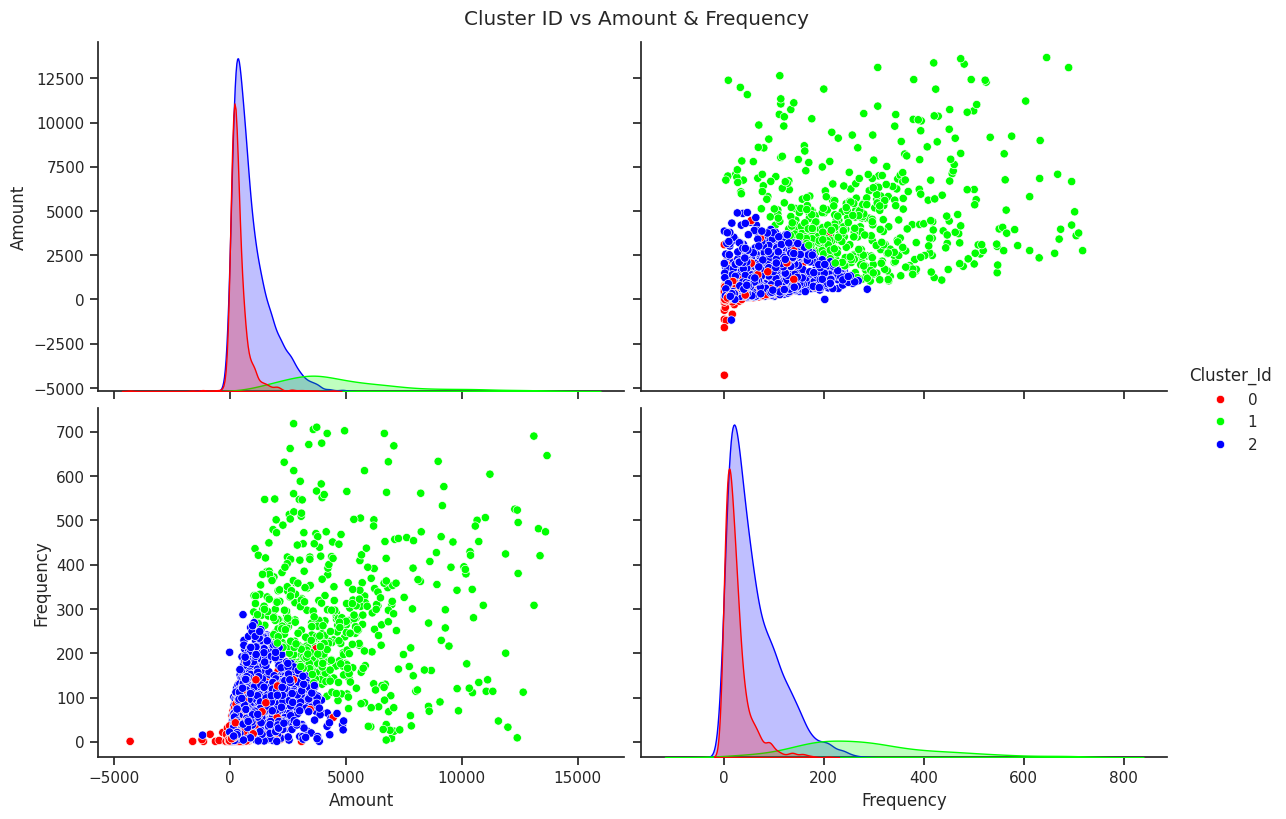

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette with Red, Green, and Blue
custom_palette = sns.color_palette(["#FF0000", "#00FF00", "#0000FF"])

# Create a scatter plot matrix with separate plots for each cluster, custom palette, and a larger size
sns.set(style="ticks")
sns.pairplot(merged_rfm, hue='Cluster_Id', vars=['Amount', 'Frequency'], palette=custom_palette, height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Frequency', y=1.02)
plt.show()

In [46]:
fig = px.box(merged_rfm, x='Cluster_Id', y='Frequency',
             title="Cluster Id vs Frequency Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

### Box plot to visualize Cluster Id vs Recency¶

In [47]:
fig = px.box(merged_rfm, x='Cluster_Id', y='Recency',
             title="Cluster Id vs Recency Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Recency': 'Recency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Recency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [48]:
# Selecting the two features for clustering
data_for_clustering = merged_rfm[['Amount', 'Frequency']]

# Specify the number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_2D'] = kmeans.fit_predict(data_for_clustering)

# Create a scatter plot with Plotly
fig = px.scatter(merged_rfm, x='Amount', y='Frequency', color='Cluster_2D',
                 title='Clustering by Amount and Frequency',
                 labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Cluster_2D': 'Cluster'})

fig.update_layout(
    xaxis=dict(title="Amount", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    width=800,
    height=600
)

fig.show()

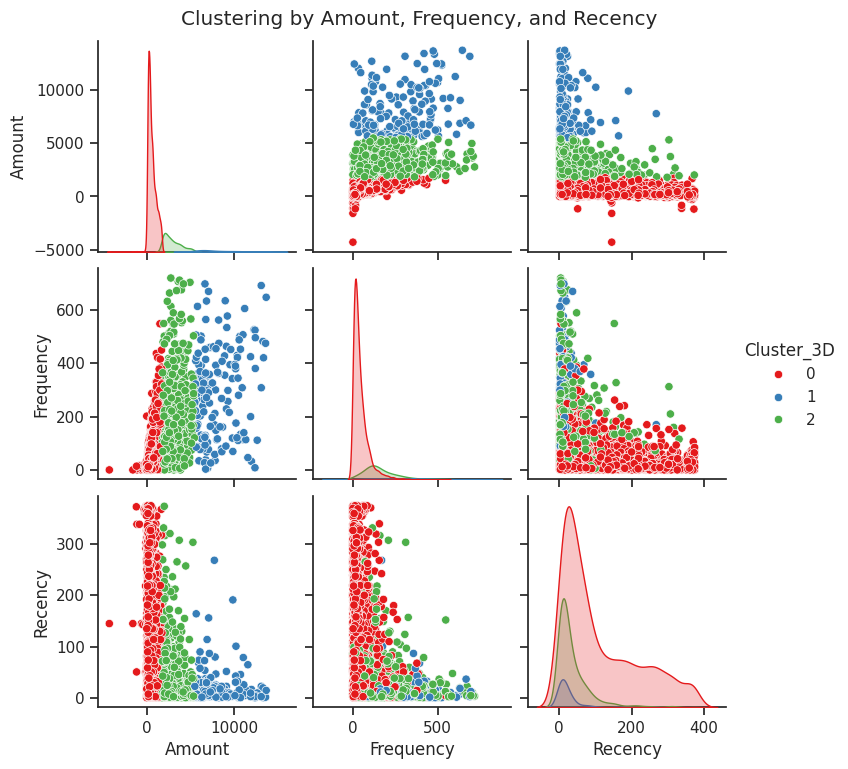

In [49]:
# Selecting the three features for clustering
data_for_clustering = merged_rfm[['Amount', 'Frequency', 'Recency']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters (scatter plot matrix)
sns.set(style="ticks")
sns.pairplot(merged_rfm, hue='Cluster_3D', vars=['Amount', 'Frequency', 'Recency'], palette='Set1')
plt.suptitle('Clustering by Amount, Frequency, and Recency', y=1.02)
plt.show()

In [50]:
import plotly.express as px

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(merged_rfm, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()

### **Hierarchical Clustering**
**Hierarchical** clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy.There are two main types of hierarchical clustering:

#### 1. **Agglomerative Hierarchical Clustering**
Agglomerative clustering is a "bottom-up" approach:

**Initialization**: Start with each data point as its own cluster.\
**Merging**: Iteratively merge the closest pairs of clusters based on a distance metric.\
**Stopping Criterion**: Continue merging until all points are in a single cluster or until a specified number of clusters is reached.

Common linkage criteria for merging clusters include:

- **Single Linkage (Nearest Point Linkage)**: The distance between two clusters is the minimum distance between any single pair of points, one from each cluster.
- **Complete Linkage (Furthest Point Linkage)**: The distance between two clusters is the maximum distance between any single pair of points, one from each cluster.
- **Average Linkage (Mean Linkage)**: The distance between two clusters is the average distance between all pairs of points, one from each cluster.
- **Centroid Linkage**: The distance between two clusters is the distance between their centroids (mean points of the clusters).
- **Ward’s Linkage**: The distance between clusters is measured by the increase in the total within-cluster variance when two clusters are merged.

#### 2. **Divisive Hierarchical Clustering**
Divisive clustering is a "top-down" approach:

- **Initialization**: Start with all data points in a single cluster.
- **Splitting**: Iteratively split the cluster into smaller clusters until each data point is its own cluster or until a stopping criterion is met.

Divisive clustering is less commonly used compared to agglomerative clustering due to its higher computational complexity. The main challenge is to determine the best way to split clusters at each step.

- **Single Linkage**:\
In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

**Time Complexity**:
The time complexity of Hierarchical Clustering is O(n² * log n) for most linkage methods (e.g., single, complete, average), where:

n is the number of data points.

**Runtime Analysis**:

**Efficiency**: Hierarchical Clustering is less efficient than K-Means, especially as the number of data points increases. The quadratic complexity makes it impractical for very large datasets.

**Memory Usage**: This method also requires significant memory, as it involves computing and storing an n x n distance matrix.
Scalability: Due to its time complexity, Hierarchical Clustering is best suited for smaller datasets. For larger datasets, the runtime can become prohibitive, and the method may not scale well.

**Practical Consideration**:
In your project, if the dataset size is moderate, Hierarchical Clustering can be run efficiently, but for large datasets, it could be computationally expensive and time-consuming. The choice of linkage method can also influence runtime, with single linkage being the fastest but potentially leading to chaining effects.


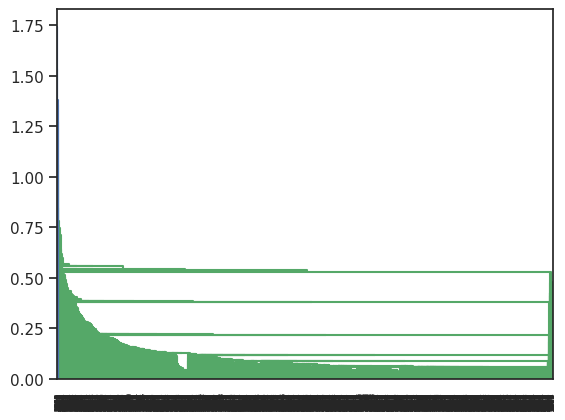

In [52]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Single linkage:

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

**Complete Linkage**

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

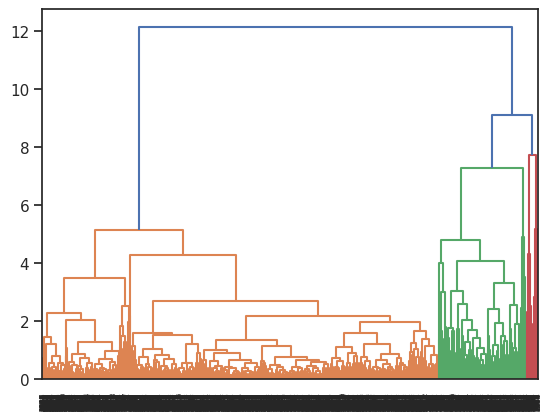

In [53]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

**Average Linkage:**

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

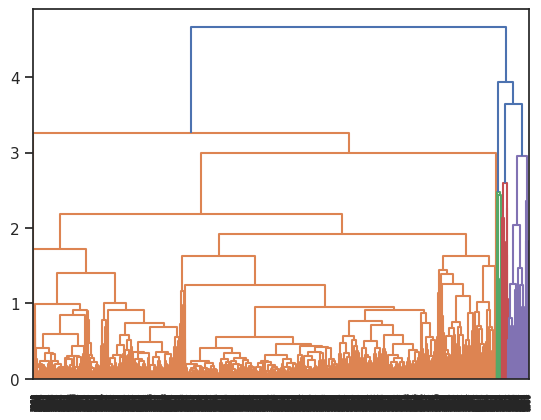

In [54]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [55]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
# Assign cluster labels

merged_rfm['Cluster_Labels'] = cluster_labels
merged_rfm.head()

,Amount,Frequency,Recency,Cluster_Id,Cluster_2D,Cluster_3D,Cluster_Labels
CustomerID,,,,,,,
12346.0,0.00,2,326,0,1,2,0
12347.0,4310.00,182,3,1,0,0,0
12348.0,1797.24,31,76,2,0,0,0
12349.0,1757.55,73,19,2,0,0,0
12350.0,334.40,17,311,0,1,2,0


In [57]:
fig = px.box(merged_rfm, x='Cluster_Labels', y='Amount',
             title="Cluster Labels vs Amount Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Amount': 'Amount'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [58]:
fig = px.box(merged_rfm, x='Cluster_Labels', y='Frequency',
             title="Cluster Labels vs Frequency Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [59]:
fig = px.box(merged_rfm, x='Cluster_Labels', y='Recency',
             title="Cluster Labels vs Recency Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Recency': 'Recency'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Recency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

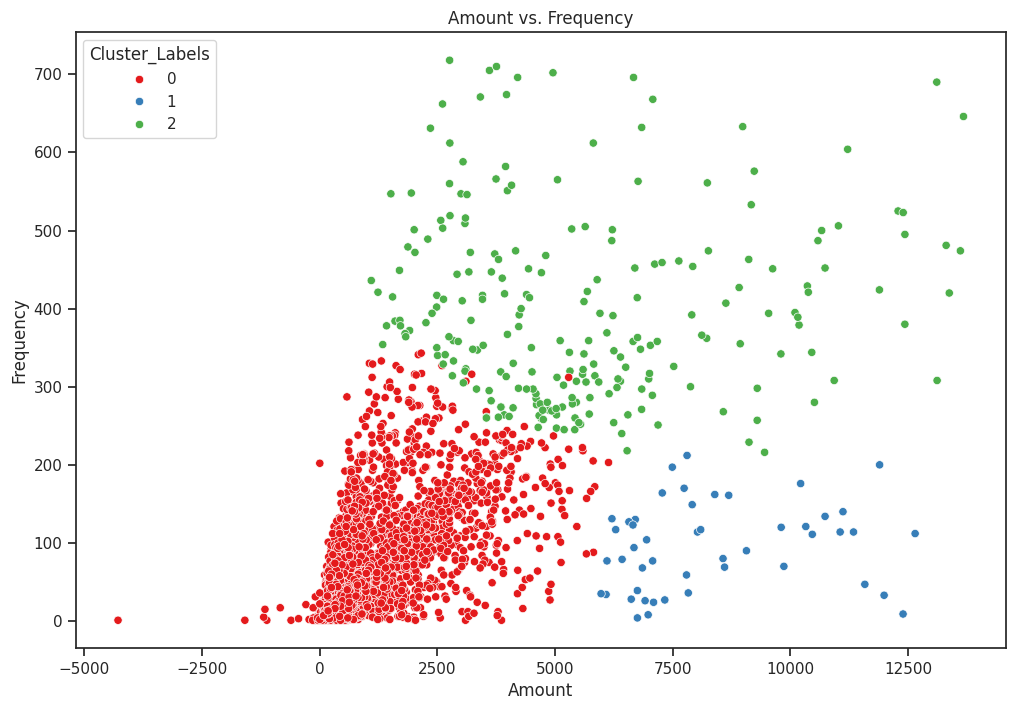

In [60]:
# Pairwise scatter plots for clustering (2D)
plt.figure(figsize=(12, 8))  # Adjust the figure size here

# Amount vs. Frequency
sns.scatterplot(x='Amount', y='Frequency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Amount vs. Frequency');

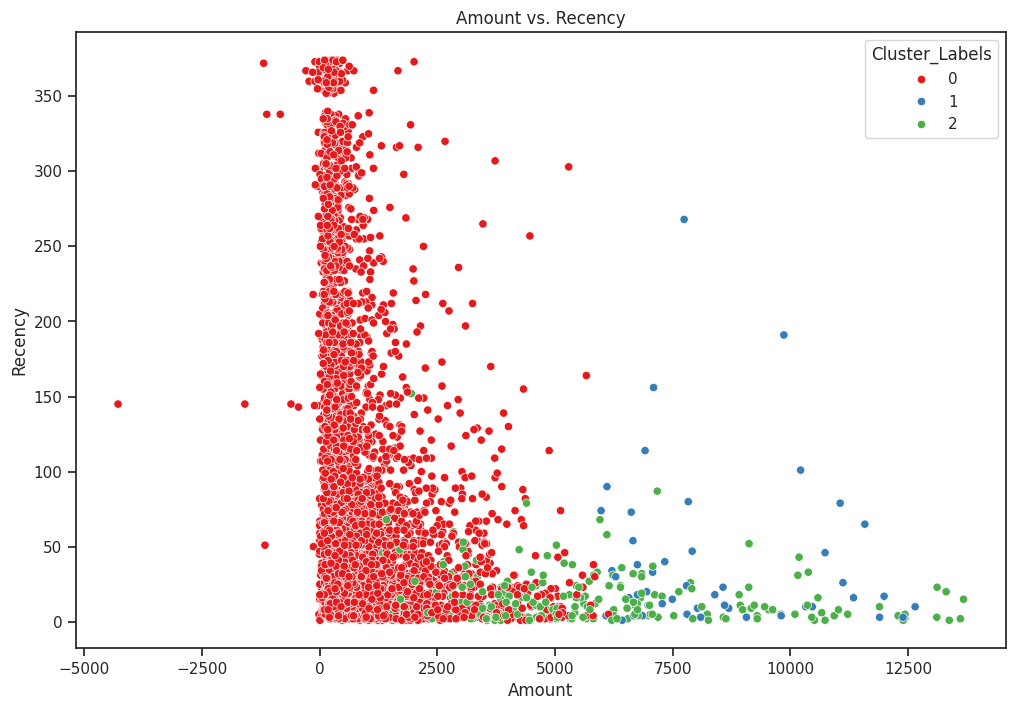

In [61]:
plt.figure(figsize=(12, 8))  # Adjust the figure size here

sns.scatterplot(x='Amount', y='Recency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Amount vs. Recency');

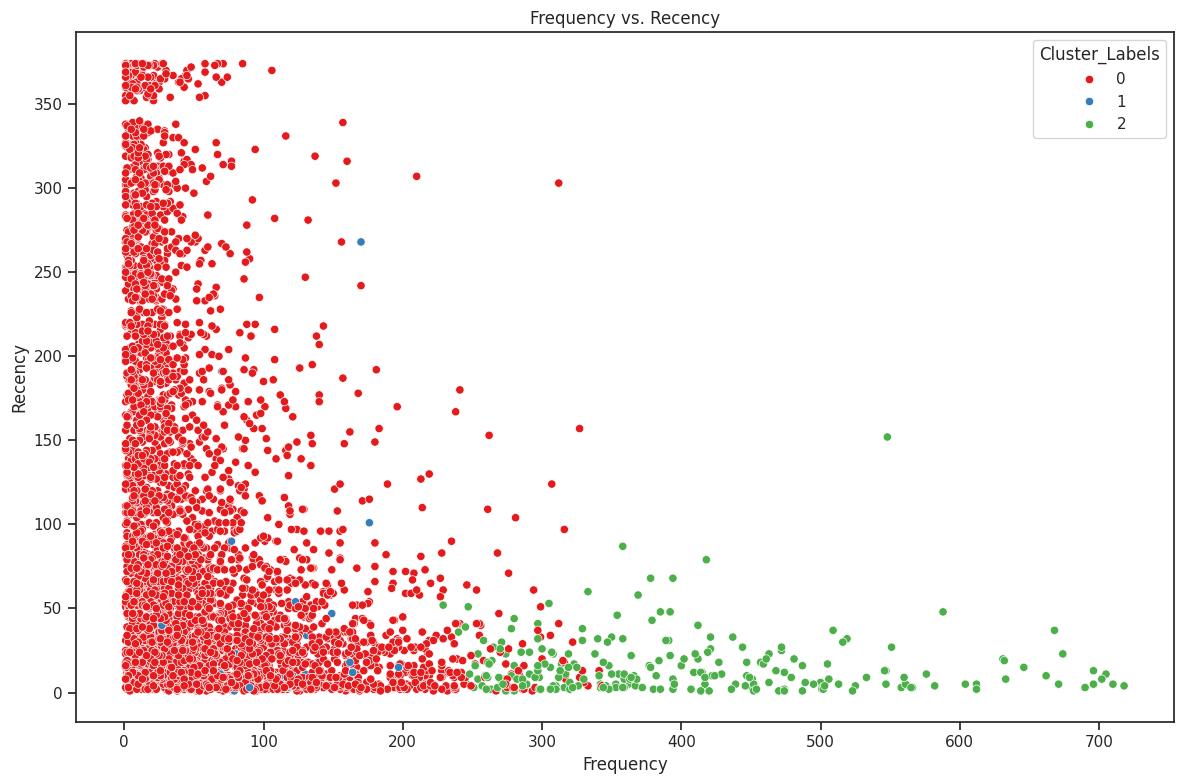

In [62]:
# Frequency vs. Recency
plt.figure(figsize=(12, 8))  # Adjust the figure size here
sns.scatterplot(x='Frequency', y='Recency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Frequency vs. Recency')

plt.tight_layout()
plt.show()

In [63]:
# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(merged_rfm, x='Amount', y='Frequency', z='Recency', color='Cluster_Labels',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()

In [64]:
import plotly.express as px

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(merged_rfm, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()

## **Discussion and Conclusion**

**Discussion and Takeaways**
The clustering analysis using K-Means and Hierarchical Clustering has provided valuable insights into customer segmentation.

**K-Means Clustering**: The analysis identified three distinct customer segments:

- **Cluster 1**: Customers who are frequent buyers, spend more, and have recently purchased. This cluster likely represents loyal customers who are highly engaged with the brand.

- **Cluster 2**: Customers who buy less frequently but have made recent purchases. This group could be classified as new customers, showing recent interest but not yet frequent buyers.

- **Cluster 0**: Customers who spend less, buy infrequently, and have not made recent purchases. This segment may represent churned customers who have lost interest over time.


**Hierarchical Clustering**: The results echoed similar insights but provided a different perspective on customer behavior:

- **Cluster 2**: Customers in this cluster are frequent buyers and spend a high amount, indicating high-value customers.

- **Cluster 1**: Customers who also spend a significant amount but purchase less frequently compared to Cluster 2.

- **Cluster 0**: Customers who have the lowest spending and frequency, reflecting disengaged or low-value customers.


**Challenges and Limitations**
Despite the valuable insights, several challenges were encountered:

**Cluster Overlap**: Both clustering methods showed some overlap in the characteristics of clusters, making it difficult to draw clear-cut distinctions between some segments.

**Feature Selection**: The choice of features (Amount, Frequency, and Recency) was crucial, and alternative features or combinations might yield different insights.

**Algorithm Sensitivity**: The K-Means algorithm is sensitive to the initial choice of centroids and might lead to suboptimal clustering if the initialization is not optimal.

**Suggestions for Improvement**

To enhance the clustering analysis and gain more accurate insights, consider the following improvements:

**Feature Engineering**: Experiment with additional features or alternative feature combinations to better capture the nuances of customer behavior.

**Model Validation**: Incorporate more validation techniques, such as cross-validation or different initialization methods, to assess the robustness of the clustering results.

**Alternative Algorithms**: Explore other clustering algorithms, such as DBSCAN or Gaussian Mixture Models, which might handle different data characteristics better and provide additional insights.

**Conclusions**

The clustering analysis has successfully segmented customers into meaningful groups, providing actionable insights into customer behavior. While K-Means and Hierarchical Clustering have both been effective, addressing the identified challenges and exploring additional methods could further enhance the understanding of customer segments and improve the overall model performance.

## **Writes UP**

Here are some of the key outcomes of the project:

- Did **Data exploration**.
- Data Cleaning (Dropping **Missing Values** and **removing outliers**).
- (**EDA**) Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.
- Appropriate Transformations were applied on the data to satisfy the key assumptions. Followed by **Standardization**.
- **K Means** algorithm was applied and ***k parameter is tuned*** using the ***Elbow Plot*** and ***Silhouette***.Results are plotted.
- **Hierarchical Clustering** is applied and results are also plotted.

Made Inference on the customers of resulting clusters based on the clustering result of these models.
